In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
plt.ioff()

In [3]:
D = []
for name in tqdm(glob.glob('h_loss_*')):
    _1, _2, n, spam, avgover, batches, batchsize, loss = name.split('/')[-1].split('_')
    with open(name,'r') as f:
        d = eval(f.read())
        d = pd.DataFrame(d)
        d['epoch'] = d.index
        d['n'] = int(n)
        d['spam'] = float(spam)
        d['avgover'] = float(avgover)
        d['batches'] = int(batches)
        d['batchsize'] = int(batchsize)
        d['loss'] = loss
        D.append(d)
D = pd.concat(D,ignore_index=True)

100%|██████████| 18/18 [00:00<00:00, 34.69it/s]


In [4]:
D['datasize'] = D['batches']*D['batchsize']*D['avgover']
D['pulses'] = D['batches']*D['batchsize']
D['P'] = D['pulses']
D['S'] = D['avgover']
D['C'] = D['loss']
D['V'] = D['val_loss']
D['SPaM'] = D['spam']
Dlast = D.loc[D.groupby(['n', 'spam', 'avgover', 'batches', 'batchsize', 'loss'])['epoch'].idxmax()]
Dspamless = Dlast[Dlast.spam==0]
Dspammost = Dlast[Dlast.spam==0.01]
Dfin = Dlast[Dlast.avgover<1e10]

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


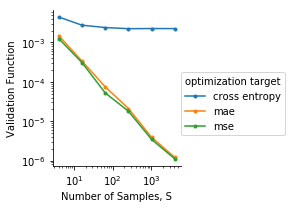

In [15]:
Dlast.loss[Dlast.loss=='crossentropy'] = 'cross entropy'
Dlast['optimization target'] = Dlast.loss
fg = sns.FacetGrid(Dlast, hue='optimization target',)
fg.map(plt.loglog,'avgover','val_mean_squared_error',marker='.')
fg.add_legend()
#fg.axes[0][0].legend(['Cross Entropy','MAE','MSE'])
fg.set_xlabels('Number of Samples, S')
fg.set_ylabels('Validation Function')
fg.savefig('loss_choice.png',dpi=400)